PHS6953HE<br>
Labo 2<br>
Simon Desrochers<br>
2145824

In [10]:
import numpy as np
import scipy.integrate as integrate
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt
from scipy.special import jn
from scipy.signal import find_peaks
from scipy.optimize import curve_fit


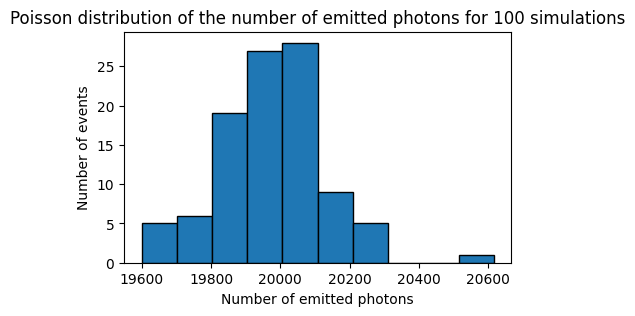

In [11]:
# Part 1
# 1.1)
poisson_mean = 20000 #(photons)
poisson_dist = np.random.poisson(poisson_mean,size=100)
plt.figure(figsize=(5, 3))
plt.hist(poisson_dist,edgecolor='black')
plt.title('Poisson distribution of the number of emitted photons for 100 simulations')
plt.xlabel('Number of emitted photons')
plt.ylabel('Number of events')
plt.show()

C:\Users\sdesr\AppData\Local\Temp\ipykernel_8716\51624708.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  photon_list = np.arange(0,number_of_photons,1) + 1


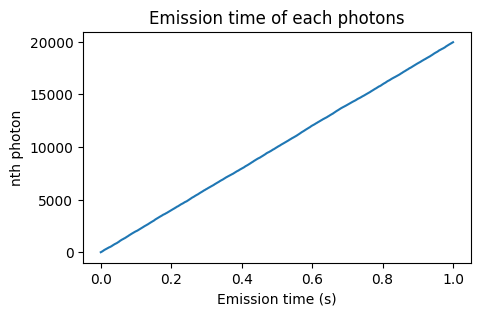

[19936]


In [12]:
# 1.2)
number_of_photons = np.random.poisson(poisson_mean,size=1)
photon_list = np.arange(0,number_of_photons,1) + 1
emission_time = np.sort(np.random.uniform(0,1,number_of_photons)) # (s)
plt.figure(figsize=(5, 3))
plt.plot(emission_time,photon_list)
plt.title('Emission time of each photons')
plt.xlabel('Emission time (s)')
plt.ylabel('nth photon')
plt.show()
print(number_of_photons)

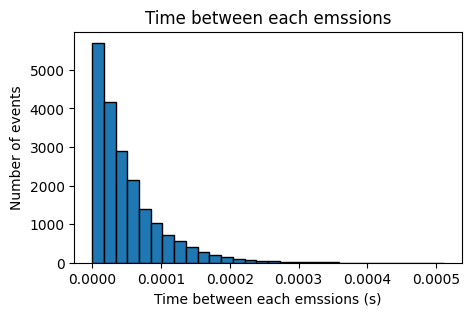

In [13]:
# 1.3)
time_between_emissions = np.diff(emission_time) # (s)
plt.figure(figsize=(5, 3))
plt.hist(time_between_emissions,bins=30,edgecolor='black')
plt.title('Time between each emssions')
plt.xlabel('Time between each emssions (s)')
plt.ylabel('Number of events')
plt.show()

If the emissons were evenly spaced in time, the time between each emission would be unique.

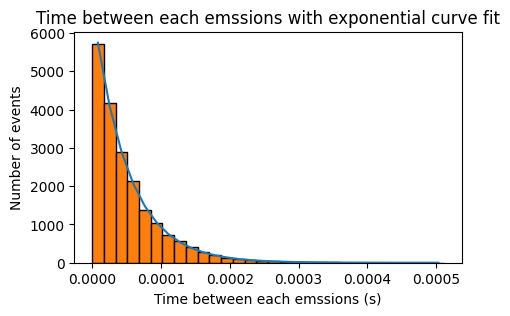

The curve fit is y = ax^b with a = 6807.0 and b = -19915.0


In [14]:
# 1.4)
def expo(x, a, b):
    return a * np.exp(b * x)
biny, binx = np.histogram(time_between_emissions,bins=30)
bin_centers = (binx[:-1] + binx[1:]) / 2
params, covariance = curve_fit(expo, bin_centers, biny)
plt.figure(figsize=(5, 3))
plt.plot(bin_centers, expo(bin_centers,*params))
plt.hist(time_between_emissions,bins=30,edgecolor='black')
plt.title('Time between each emssions with exponential curve fit')
plt.xlabel('Time between each emssions (s)')
plt.ylabel('Number of events')
plt.show()
print(f'The curve fit is y = ax^b with a = {np.round(params[0])} and b = {np.round(params[1])}')

I used D = 1 um^2/s


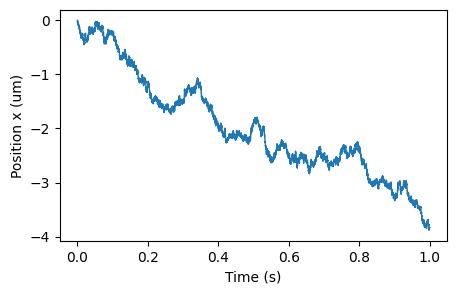

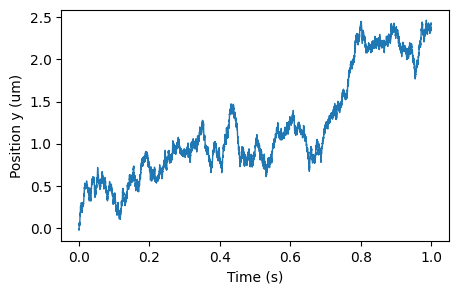

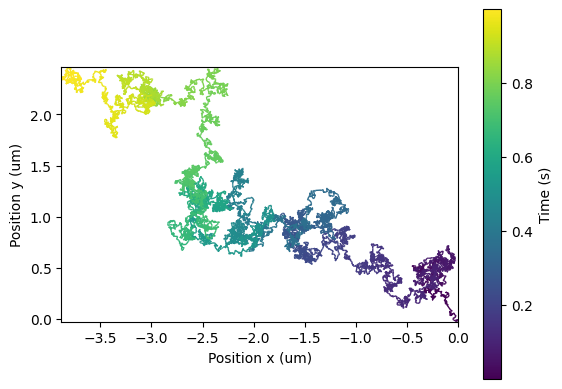

In [15]:
# Part 2
# 2.1)
from matplotlib.collections import LineCollection

D = 1 #(um^2/s)
print(f"I used D = {D} um^2/s")
sigma = np.sqrt(2*D*time_between_emissions)
mu = 0
pos = np.linspace(-1,1,1000) #(um)
dx = np.zeros(len(sigma))
dy = np.zeros(len(sigma))
for i in range(len(sigma)):
    dx[i] = np.random.normal(0,sigma[i])
    dy[i] = np.random.normal(0,sigma[i])
x_diff = np.cumsum(dx)
y_diff = np.cumsum(dy)
t = np.array(np.cumsum(time_between_emissions))
plt.figure(figsize=(5,3))
plt.plot(t,x_diff,linewidth=1)
plt.xlabel('Time (s)')
plt.ylabel('Position x (um)')
plt.figure(figsize=(5,3))
plt.plot(t,y_diff,linewidth=1)
plt.xlabel('Time (s)')
plt.ylabel('Position y (um)')

# 2.2)
def plot_xyt(x,y,t):
    norm = plt.Normalize(t.min(), t.max())
    points = np.array([x, y]).T  # Shape (100, 2)
    # Create a collection of line segments
    segments = np.array([points[:-1], points[1:]]).transpose(1, 0, 2)  # Shape (99, 2, 2)
    lc = LineCollection(segments, cmap='viridis', norm=norm)
    lc.set_array(t[:-1])  # Set color based on t values
    lc.set_linewidth(1)  # Set the line width
    # Create a plot
    fig, ax = plt.subplots()
    ax.add_collection(lc)
    ax.autoscale_view()
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_aspect('equal')
    # Add a colorbar
    cbar = plt.colorbar(lc, ax=ax)
    cbar.set_label('Time (s)')
    plt.xlabel('Position x (um)')
    plt.ylabel('Position y (um)')
    plt.show()
plot_xyt(x_diff,y_diff,t)

In [16]:
# Part 3
# 3.1)
# NA = 1.35
# n = 1.33
# theta = np.arcsin(NA/n) # NA>n gives a sin > 1
theta = np.pi/2
omega = 2*np.pi*(1-np.cos(theta))
fraction = omega/(4*np.pi)
print(f"Fraction of photons that are captured : {np.round(fraction,3)}")

Fraction of photons that are captured : 0.5


3.2) They are equivalent, because both just end up reducing the number of photons hitting the camera each second.

Text(0, 0.5, 'Position y with psf (um)')

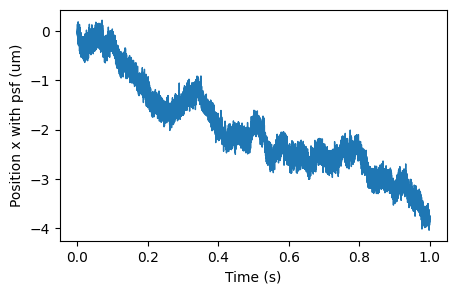

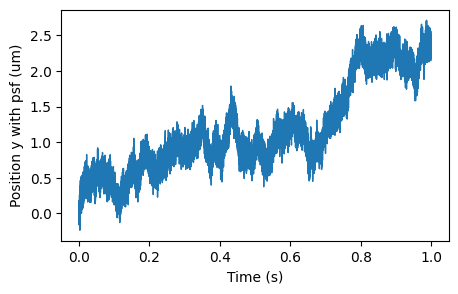

In [17]:
# 3.3)
sigma_photons = 0.1 # (um)
x_psf = x_diff+np.random.normal(loc=0,scale=sigma_photons,size=len(x_diff))
y_psf = y_diff+np.random.normal(0,sigma_photons,len(y_diff))
plt.figure(figsize=(5,3))
plt.plot(t,x_psf,linewidth=1)
plt.xlabel('Time (s)')
plt.ylabel('Position x with psf (um)')
plt.figure(figsize=(5,3))
plt.plot(t,y_psf,linewidth=1)
plt.xlabel('Time (s)')
plt.ylabel('Position y with psf (um)')


NameError: name 'clear_output' is not defined

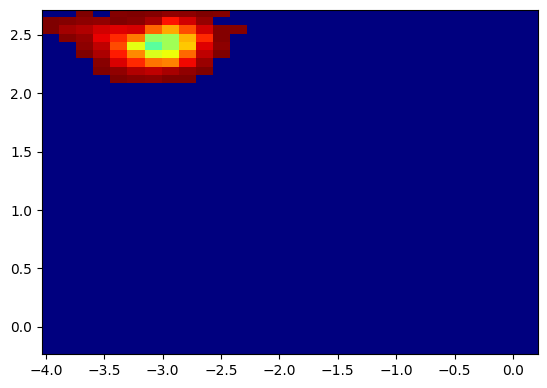

In [18]:
# 3.4)
import imageio
save_tiff = True
time_groups = 0.1*np.linspace(0,10,11) # (s)
binsize = 0.1 # (um)
x_range = (x_psf.min(), x_psf.max())
y_range = (y_psf.min(), y_psf.max())
num_bins_x = int((x_range[1] - x_range[0]) / binsize)
num_bins_y = int((y_range[1] - y_range[0]) / binsize)
frames = []
for i in range(len(time_groups)-1):
    index = np.where((time_groups[i] <= t)&(t < time_groups[i+1]))[0]
    hist, xedges, yedges = np.histogram2d(x_psf[index], y_psf[index], bins=(num_bins_x, num_bins_y), range=[x_range, y_range])
    frames.append(hist)

# Save the frames as a TIFF movie
output_path = 'histogram_movie.tiff'
with imageio.get_writer(output_path, format='TIFF', mode='I') as writer:
    for frame in frames:
        writer.append_data((frame * 255).astype(np.uint8))  # Convert to uint8 for image format

# Function to play the saved TIFF movie
def play_tiff_movie(input_path):
    # Read the TIFF movie file
    reader = imageio.get_reader(input_path)
    
    # Create a plot
    fig, ax = plt.subplots()
    
    # Loop through the frames and display them
    for frame in reader:
        ax.clear()
        ax.imshow(frame, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
                  aspect='equal',cmap='jet', origin='lower')
        clear_output(wait=True)  # Clear the output to refresh the plot in Jupyter
        display(fig)  # Display the updated figure in the notebook
        plt.pause(0.1)  # Pause between frames (this controls the playback speed)
    
    plt.show()

# Play the saved TIFF movie
play_tiff_movie(output_path)


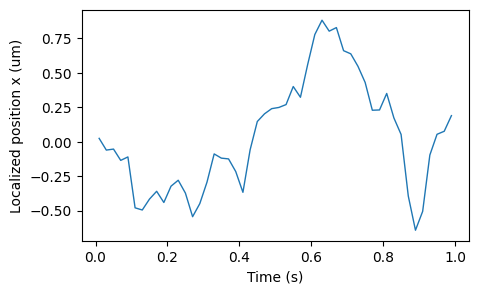

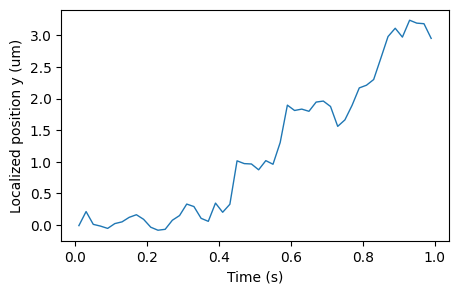

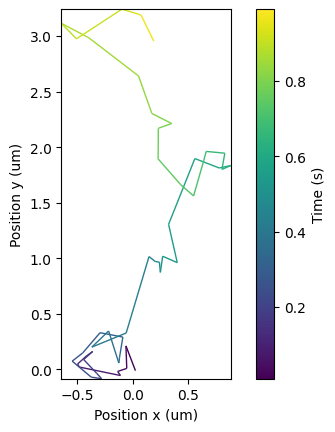

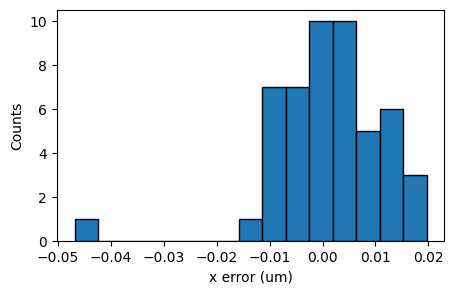

In [1978]:
# Part 4
num_frames = 50
time_groups = 0.1*np.linspace(0,10,num_frames+1)
binsize = 0.1 # (um)
x_range = (x_psf.min(), x_psf.max())
y_range = (y_psf.min(), y_psf.max())
num_bins_x = int((x_range[1] - x_range[0]) / binsize)
num_bins_y = int((y_range[1] - y_range[0]) / binsize)

def gaussian_2d(xy, amp, x0, y0, sigma_x, sigma_y):
    x, y = xy
    return amp * np.exp(-(((x - x0) ** 2) / (2 * sigma_x ** 2) + ((y - y0) ** 2) / (2 * sigma_y ** 2)))
  

def gaussian_fit(zdata,xdata,ydata):
    x, y = np.meshgrid(xdata, ydata)
    # Flatten the data for curve_fit
    xfit = x.ravel()
    yfit = y.ravel()
    zfit = zdata.ravel()
    # Estimate initial x0 and y0 based on the peak
    peak_index = np.unravel_index(np.argmax(zdata), zdata.shape)
    x0_guess = xdata[peak_index[1]]  # Corresponding x value
    y0_guess = ydata[peak_index[0]]  # Corresponding y value
    params_guess = (100,x0_guess,y0_guess,0.4,0.4)
    lower_bounds = [10, min(xdata), min(ydata), 0.1, 0.01]
    upper_bounds = [200, max(xdata), max(ydata), 1, 1]
    # Fit the data
    popt, pcov = curve_fit(gaussian_2d, (xfit,yfit), zfit, p0=params_guess, bounds=(lower_bounds, upper_bounds), maxfev=10000)
    return popt

x_loc = np.zeros(len(time_groups)-1)
y_loc = np.zeros(len(time_groups)-1)
av_x = np.zeros(len(time_groups)-1)
av_y = np.zeros(len(time_groups)-1)
for i in range(len(time_groups)-1):
    index = np.where((time_groups[i] <= t)&(t < time_groups[i+1]))[0]
    hist, xedges, yedges = np.histogram2d(x_psf[index], y_psf[index], bins=(num_bins_x, num_bins_y),
                                          range=[x_range, y_range])
    av_x[i] = np.mean(x_diff[index])
    av_y[i] = np.mean(y_diff[index])
    x_centers = (xedges[:-1] + xedges[1:]) / 2
    y_centers = (yedges[:-1] + yedges[1:]) / 2
    params = gaussian_fit(hist.T,x_centers, y_centers)
    x_loc[i] = params[1]
    y_loc[i] = params[2]

# 4.1)
time_center = (time_groups[:-1] + time_groups[1:]) / 2
plt.figure(figsize=(5,3))
plt.plot(time_center,x_loc,linewidth=1)
plt.xlabel('Time (s)')
plt.ylabel('Localized position x (um)')
plt.figure(figsize=(5,3))
plt.plot(time_center,y_loc,linewidth=1)
plt.xlabel('Time (s)')
plt.ylabel('Localized position y (um)')
plot_xyt(x_loc,y_loc,time_center)

# 4.2)
x_err = av_x - x_loc
y_err = av_y - y_loc
plt.figure(figsize=(5,3))
plt.hist(x_err,bins=15,edgecolor='black')
plt.xlabel('x error (um)')
plt.ylabel('Counts')
plt.show()



4.3) Emitter movement makes the gaussian fit a little harder because the shape of the signal is less symetrical and sometimes the maximum is not on a single point but over a line.<br>

4.4) It gives less time to the emitter to change position, so the curve fit is easier, but it also collects less photons and loses some information on the emitter's position while the laser is off.

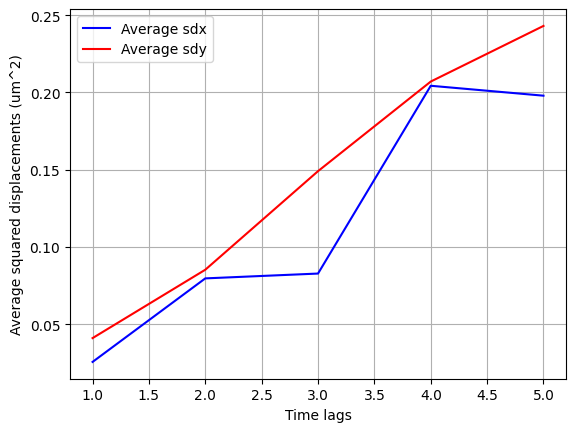

In [1979]:
# Part 5
# 5.1)
# Squared displacements with time lag = i
time_lags = [1,2,3,4,5]
av_sdx = np.zeros(len(time_lags))
av_sdy = np.zeros(len(time_lags))

# IT DOESNT CONSIDER ALL THE POINTS
for i in time_lags:
    sdx = np.diff(x_loc[::i])**2
    sdy = np.diff(y_loc[::i])**2
    sdt = np.diff(time_center[::i])**2
    av_sdx[i-1] = np.mean(sdx)
    av_sdy[i-1] = np.mean(sdy)

plt.plot(time_lags, av_sdx, label='Average sdx', color='b')
plt.plot(time_lags, av_sdy, label='Average sdy', color='r')
plt.xlabel('Time lags')
plt.ylabel('Average squared displacements (um^2)')
plt.legend()
plt.grid(True)
plt.show()



5.2) With a time lag that is too large, a brownian diffuser has the time to turn around and come close to it's original position and that would make the squared distance irrelevant. We could use the highest time lag that doesn't create a decreasing squared distance.

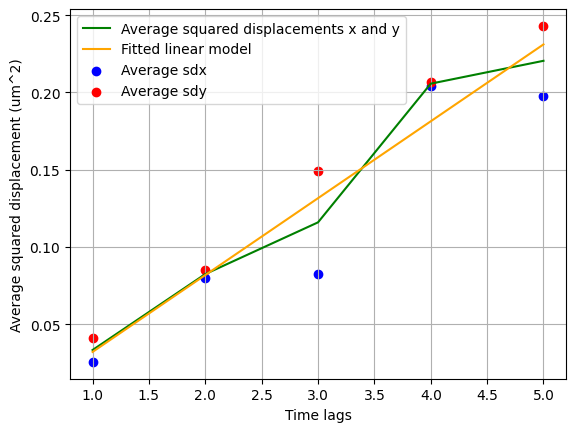

Fitted values : m = 0.0498, b = -0.0178.
If m = c * D, c = 0.0498
D = 0.027212823603002728 um^2/s


In [1980]:
# Part 6
# 6.1)
def line(x,m,b):
    return m*np.array(x) + b

# I use the average of the x and y squared displacements for the curve fit
av_sd = (av_sdx + av_sdy)/2
popt, pcov = curve_fit(line,time_lags,av_sd)
fitted_line = line(time_lags,*popt)
plt.plot(time_lags, av_sd, label='Average squared displacements x and y',color='g')
plt.plot(time_lags,fitted_line, label='Fitted linear model',color='orange')
plt.scatter(time_lags, av_sdx, label='Average sdx', color='b')
plt.scatter(time_lags, av_sdy, label='Average sdy', color='r')
plt.xlabel('Time lags')
plt.ylabel('Average squared displacement (um^2)')
plt.legend()
plt.grid(True)
plt.show()
print(f"Fitted values : m = {round(popt[0],4)}, b = {round(popt[1],4)}.")

# 6.2)
c = popt[0]/D
print(f"If m = c * D, c = {round(c,4)}")

# 6.3)
kb = 1.38e-23 # J/K
r = 3e-9 # m
T = 37 + 273 # K
n = 2.78 # Viscosity of whole blood at 37 C (mPa*s) https://wiki.anton-paar.com/en/whole-blood/
D = (kb*T)/(6*np.pi*n*r)
print(f"D = {D*1e12} um^2/s")

Fitted values : m = 9e-06, b = 8.4e-05.


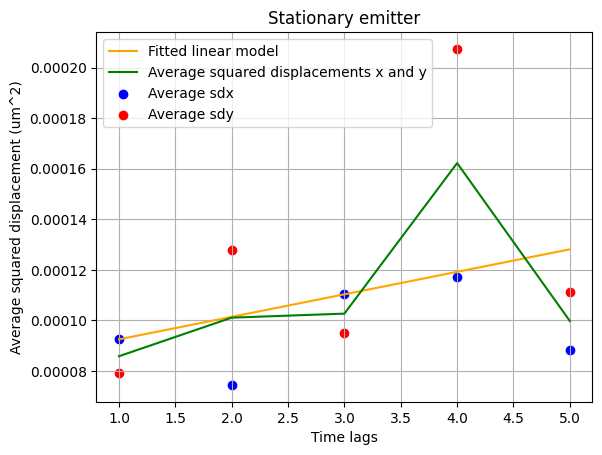

Fitted values : a = 2.6e-05, b = 2.397428, c = 0.000142.


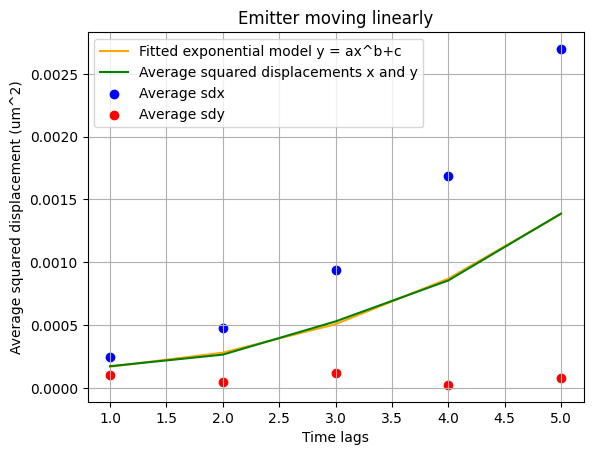

In [1981]:
# Part 7
def exp(x,a,b,c):
    return a*np.array(x)**b + c

def MSF(x_psf,y_psf,fit_mode,title):
    x_range = (x_psf.min(), x_psf.max())
    y_range = (y_psf.min(), y_psf.max())
    num_bins_x = int((x_range[1] - x_range[0]) / binsize)
    num_bins_y = int((y_range[1] - y_range[0]) / binsize)

    x_loc = np.zeros(len(time_groups)-1)
    y_loc = np.zeros(len(time_groups)-1)
    for i in range(len(time_groups)-1):
        index = np.where((time_groups[i] <= t)&(t < time_groups[i+1]))[0]
        hist, xedges, yedges = np.histogram2d(x_psf[index], y_psf[index], bins=(num_bins_x, num_bins_y),
                                            range=[x_range, y_range])
        x_centers = (xedges[:-1] + xedges[1:]) / 2
        y_centers = (yedges[:-1] + yedges[1:]) / 2
        params = gaussian_fit(hist.T,x_centers, y_centers)
        x_loc[i] = params[1]
        y_loc[i] = params[2]

    time_center = (time_groups[:-1] + time_groups[1:]) / 2

    for i in time_lags:
        sdx = np.diff(x_loc[::i])**2
        sdy = np.diff(y_loc[::i])**2
        sdt = np.diff(time_center[::i])**2
        av_sdx[i-1] = np.mean(sdx)
        av_sdy[i-1] = np.mean(sdy)
    av_sd = (av_sdx + av_sdy)/2

    if fit_mode == 'lin':
        popt, pcov = curve_fit(line,time_lags,av_sd)
        print(f"Fitted values : m = {round(popt[0],6)}, b = {round(popt[1],6)}.")
        fitted_line = line(time_lags,*popt)
        plt.plot(time_lags,fitted_line, label='Fitted linear model',color='orange')
    if fit_mode == 'exp':
        lower_bounds = [-100, 0, -100]
        upper_bounds = [100, 10, 100]
        popt, pcov = curve_fit(exp,time_lags,av_sd,maxfev = 2000, bounds=(lower_bounds,upper_bounds))
        print(f"Fitted values : a = {round(popt[0],6)}, b = {round(popt[1],6)}, c = {round(popt[2],6)}.")
        fitted_line = exp(time_lags,*popt)
        plt.plot(time_lags,fitted_line, label='Fitted exponential model y = ax^b+c',color='orange')

    plt.plot(time_lags, av_sd, label='Average squared displacements x and y',color='g')
    plt.scatter(time_lags, av_sdx, label='Average sdx', color='b')
    plt.scatter(time_lags, av_sdy, label='Average sdy', color='r')
    plt.xlabel('Time lags')
    plt.ylabel('Average squared displacement (um^2)')
    plt.legend()
    plt.grid(True)
    plt.title(title)
    plt.show()

# 7.1)
x_psf = np.random.normal(loc=0,scale=sigma_photons,size=len(x_diff))
y_psf = np.random.normal(0,sigma_photons,len(y_diff))
MSF(x_psf,y_psf,'lin','Stationary emitter')

# 7.2)
speed = 0.5 # um/s
n_steps = len(x_diff)
linear_movement = np.linspace(0,speed,n_steps)
linear_time = np.linspace(0,1,n_steps)
lin_pos = interpolate.interp1d(linear_time, linear_movement, bounds_error=False,
                           fill_value=(linear_movement[0],linear_movement[-1]))

x_lin_psf = lin_pos(t) + np.random.normal(0,sigma_photons,len(y_diff))
y_psf = np.random.normal(0,sigma_photons,len(y_diff))
MSF(x_lin_psf,y_psf,'exp','Emitter moving linearly')


7.3) For a linear movement, an exponential curve fit with y = ax^b + c (x = time lag) fits very well.<br>
7.4) We know that the particle is stationary if the MSD curve is very irregular, the particle is diffusing if the MSD curve is linear with a positive slope and the particle is moving linearly at constant speed if the MSD curve is exponential.

Part 8<br>
8.1)